Continuation of how to find the time constant. 

Mira


In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as pl
%matplotlib inline
import pickle
import seaborn as sns
import sys
import numpy as np
from scipy.optimize import curve_fit

sns.set_palette("coolwarm",15)
sns.set_style("whitegrid")

In [2]:
file=open( '../../data/raw_data/20160428_1313_W1204_ref.pkl' , 'rb')
d=pickle.load(file)
file.close()

i = 8
Nsize = 2**i
dt=(1/(d['sample freq'])) #period
T1=dt*(Nsize) #full period
v=(d['speed'])
X = v*T1 #full distance
dx = dt*v #smallest amount of distance travelled
total_t = (d['scan time']) #how long it ran
    
total_s = (d['samples requested']) #number of samples 
startpt = ((total_s - Nsize)/2) #starting point


endpt = startpt + Nsize #ending point


df = 1/T1
f = df*np.arange(Nsize/2)+df/2.0
fFull = df*np.arange((Nsize/2) + 1)+df/2.0


y = (d['sig0F']) 
D = y[startpt:endpt]
D = np.flipud(D)

a = d['delay0F']/v
t = a[startpt:endpt]

In [3]:
def psi1(z_not,q,p,T):
    Ns = 256
    z = t
    dz = z[2]-z[1]
    f = np.linspace(0,0.5/dz, np.floor(Ns/2))
    f_full = np.linspace(0,0.5/dz, np.floor(Ns/2) +1)
    y0=-np.cos(2*np.pi*q*(z-z_not))*(np.exp(-((z-z_not)**2)/(2*p**2)))/(np.sqrt(2*np.pi)*p)
    yf0=np.fft.rfft(y0)
    K_det =(1/(1+(1j*2*np.pi*f_full*T)))
    K_cc =(2*np.pi*f_full*.559)/(1 + (1j*2*np.pi*.559))
    K_f = np.multiply(K_det,K_cc)
    y1=np.fft.irfft(yf0*K_f*2*np.pi)
    return z,y1
#z_not = 0.012, q = 8.57718120805, p = .04

In [4]:
def findznot(P,T): #this is z_not written as a function of tau
    Znotvec = np.linspace(-.026,.026,150)
    MinzNot = np.zeros((len(Znotvec)))
    for kk in range (0,len(Znotvec)):
        z_not = Znotvec[kk]
        x,Modelf = psi1(z_not,8.57718120805,P, T)
        ModelMin = np.where(Modelf == Modelf.min())
        ModelMin = ModelMin[0]
        ModelMin = ModelMin[0]
        DataMin = np.where(D == D.min())
        DataMin = DataMin[0]
        DataMin = DataMin[0]
        MinzNot[kk] = np.abs(1-(float(ModelMin)/float(DataMin)))
    miin = np.where(MinzNot == MinzNot.min())
    miin = miin[0]
    miin = miin[0]
    BestzNot = Znotvec[miin]
    return BestzNot

In [5]:
def findahat(P,T):
    x,Modelf = psi1(findznot(P,T),8.57718120805,P,T) #z_not, q, p, T
    Mult = np.dot(D,Modelf)
    Mult2 = np.dot(Modelf,Modelf)
    aHat=Mult/Mult2
    return aHat
print findahat(.05,.02)

0.000262840500783


In [6]:
def findznot(P,T): #this is z_not written as a function of tau
    Znotvec = np.linspace(-.026,.026,150)
    MinzNot = np.zeros((len(Znotvec)))
    for kk in range (0,len(Znotvec)):
        z_not = Znotvec[kk]
        x,Modelf = psi1(z_not,8.57718120805,P, T)
        ModelMin = np.where(Modelf == Modelf.min())
        ModelMin = ModelMin[0]
        ModelMin = ModelMin[0]
        DataMin = np.where(D == D.min())
        DataMin = DataMin[0]
        DataMin = DataMin[0]
        MinzNot[kk] = np.abs(1-(float(ModelMin)/float(DataMin)))
    miin = np.where(MinzNot == MinzNot.min())
    miin = miin[0]
    miin = miin[0]
    BestzNot = Znotvec[miin]
    return BestzNot

In [7]:
pvec = np.linspace(0.03,.08,40)
znotvec = np.linspace(-.05,.05,40)
Tvec = np.linspace(.01,.07,40)
q = 8.89
#the function findznot will be used as a constant when making corner plots
#p = .05, T = .02

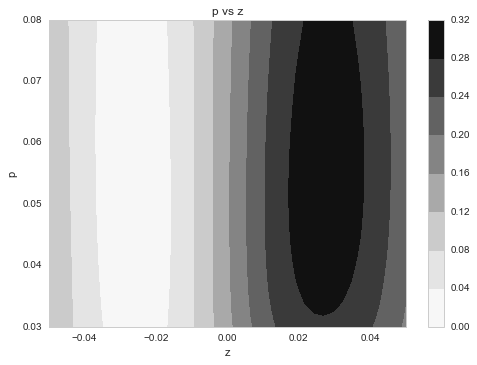

In [8]:
#p vs z
ChiMat1= np.zeros((len(znotvec),len(pvec)))
for ii in range (0,len(znotvec)):
    for jj in range (0, len(pvec)):
        z = znotvec[ii]
        p = pvec[jj]
        T = .049
        x,Modelf = psi1(z,8.89,p, T)
        Dev = np.dot((D-Modelf*(findahat(p,T))),D-Modelf*(findahat(p,T)))
        ChiMat1[ii,jj] = Dev

levs=(np.linspace(0.001,.1,80))
pl.contourf(znotvec,pvec,(ChiMat1.T))
pl.xlabel('z')
pl.ylabel('p')
pl.title('p vs z')
#pl.xscale('log')
pl.colorbar()
pl.show()

In [9]:
np.where(ChiMat1 == ChiMat1.min())

(array([9]), array([18]))

In [11]:
z1 = znotvec[12] #gotten from when tau = .02
p1 = pvec[16] #gotten from when tau = .02

z4 = znotvec[9]
p4 = pvec[18]
print z1, p1
print z4, p4

-0.0192307692308 0.0505128205128
-0.0269230769231 0.0530769230769


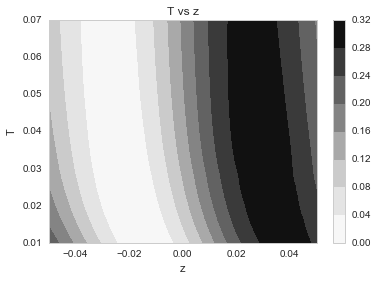

In [67]:
#T vs z
ChiMat2= np.zeros((len(znotvec),len(Tvec)))
for ii in range (0,len(znotvec)):
    for jj in range (0, len(Tvec)):
        z = znotvec[ii]
        p = .05
        T = Tvec[jj]
        x,Modelf = psi1(z,8.89,p, T)
        Dev = np.dot((D-Modelf*(findahat(p,T))),D-Modelf*(findahat(p,T)))
        ChiMat2[ii,jj] = Dev

levs=(np.linspace(0.001,.1,80))
pl.contourf(znotvec,Tvec,(ChiMat2.T))
pl.xlabel('z')
pl.ylabel('T')
pl.title('T vs z')
#pl.xscale('log')
pl.colorbar()
pl.show()

In [77]:
np.where(ChiMat2 == ChiMat2.min())

(array([12]), array([6]))

In [78]:
z2 = znotvec[12]
T2 = Tvec[6]
print z2,T2

-0.0192307692308 0.0192307692308


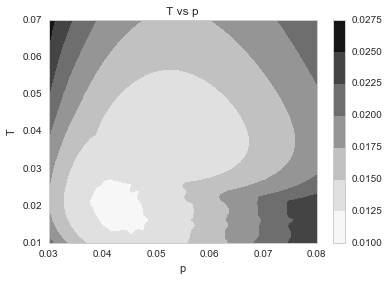

In [70]:
#T vs p
ChiMat3= np.zeros((len(pvec),len(Tvec)))
for ii in range (0,len(pvec)):
    for jj in range (0, len(Tvec)):
        p = pvec[ii]
        T = Tvec[jj]
        x,Modelf = psi1(findznot(p,T),8.89,p, T)
        Dev = np.dot((D-Modelf*(findahat(p,T))),D-Modelf*(findahat(p,T)))
        ChiMat3[ii,jj] = Dev

levs=(np.linspace(0.001,.1,80))
pl.contourf(pvec,Tvec,(ChiMat3.T))
pl.xlabel('p')
pl.ylabel('T')
pl.title('T vs p')
#pl.xscale('log')
pl.colorbar()
pl.show()

In [71]:
np.where(ChiMat3 == ChiMat3.min())

(array([10]), array([8]))

In [79]:
p3 = pvec[10]
T3 = Tvec[8]
z3 = findznot(p3,T3)
print p3,T3,z3

0.0428205128205 0.0223076923077 -0.0225100671141


In [73]:
#final optimal numbers: p = .05 and .04, T = .014,.036, znot = -.02

NameError: name 'z1' is not defined

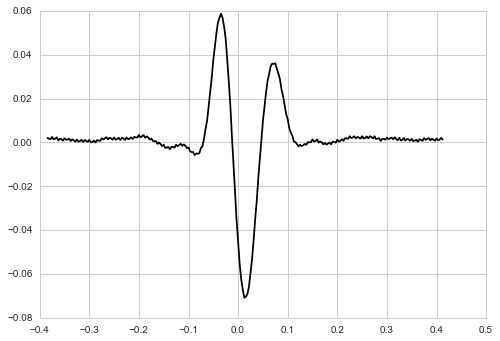

In [7]:
pl.plot(t,D, label = 'data', color = 'black')

x,Modelf1 = psi1(z1,8.89,p1,0.02) 
pl.plot(x,Modelf1*findahat(p1,0.02), label = 'model 1', color='blue')

x,Modelf2 = psi1(z2,8.89,0.05,T2) #original q: 8.57718120805
pl.plot(x,Modelf2*findahat(0.05,T2), label = 'model 2', color='green')

x,Modelf3 = psi1(z3,8.89,p3,T3) #original q: 8.57718120805
pl.plot(x,Modelf3*findahat(p3,T3), label = 'model 3', color='red')

x,Modelf3 = psi1(z4,8.89,p4,T3) #original q: 8.57718120805
pl.plot(x,Modelf3*findahat(p3,T3), label = 'model 3', color='red')

pl.xlim(-.2,.2)
pl.legend()
pl.show()

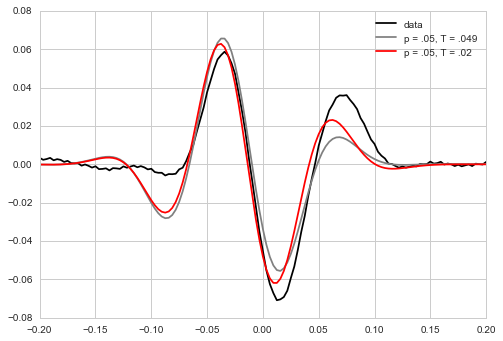

In [8]:
pl.plot(t,D, label = 'data', color = 'black')
x,Modelf = psi1(findznot(0.05,0.049),8.577,0.05,0.049) #original q: 8.57718120805
pl.plot(x,Modelf*findahat(0.05,0.049), label = 'p = .05, T = .049', color='gray')
x,Modelf1 = psi1(findznot(0.05,0.02),8.577,0.05,0.02)
pl.plot(x,Modelf1*findahat(0.05,0.02), label = 'p = .05, T = .02', color = 'red')
pl.xlim(-.2,.2) #findahat(.05,.02) = .0002
pl.legend()
pl.show()

In [9]:
#SET TAU DETECTOR TO .049 AND SEE HOW IT CHANGES
#we effectively matched the tau and tau 2 that we got by matching a chopper to a function, to the data

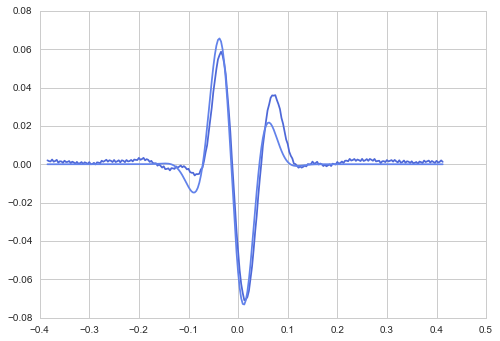

In [11]:
pl.plot(t,D, label = 'Data')
x,Modelf5 = psi1(-.01,7,0.042,0.001)

pl.plot(x,Modelf5*.0002)